# NN(Neural Network) 다중분류
- iris 데이터를 이용해서 다중 분류

In [102]:
!pip install --q ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 10.6 s (started: 2024-06-28 07:20:49 +00:00)


## 1. 데이터 준비

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

time: 833 µs (started: 2024-06-28 07:21:00 +00:00)


In [104]:
#!wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/iris.csv

--2024-06-28 07:21:00--  https://raw.githubusercontent.com/devdio/flyai_datasets/main/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3858 (3.8K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.77K  --.-KB/s    in 0s      

2024-06-28 07:21:00 (52.9 MB/s) - ‘iris.csv’ saved [3858/3858]

time: 206 ms (started: 2024-06-28 07:21:00 +00:00)


In [105]:
iris = pd.read_csv('iris.csv')
iris

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


time: 22.3 ms (started: 2024-06-28 07:21:00 +00:00)


In [106]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


time: 16.6 ms (started: 2024-06-28 07:21:00 +00:00)


In [107]:
df = iris.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
time: 6.56 ms (started: 2024-06-28 07:21:00 +00:00)


In [108]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


time: 37 ms (started: 2024-06-28 07:21:00 +00:00)


### 범주형 데이터

In [109]:
df['Species'].nunique()

3

time: 3.6 ms (started: 2024-06-28 07:21:00 +00:00)


In [110]:
df['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

time: 4.74 ms (started: 2024-06-28 07:21:00 +00:00)


<Axes: xlabel='Species'>

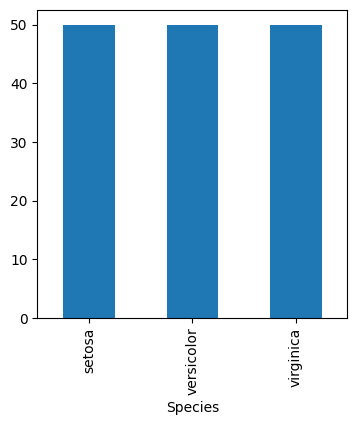

time: 186 ms (started: 2024-06-28 07:21:00 +00:00)


In [111]:
df['Species'].value_counts().plot(kind='bar', figsize=(4, 4))

### 연속형 변수

In [112]:
df_setosa = df[df['Species'] == 'setosa']
df_versicolor = df[df['Species'] == 'versicolor']
df_virginica = df[df['Species'] == 'virginica']

time: 2.57 ms (started: 2024-06-28 07:21:00 +00:00)


In [113]:
df.columns

Index(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width',
       'Species'],
      dtype='object')

time: 7.4 ms (started: 2024-06-28 07:21:00 +00:00)


(array([1., 0., 0., 2., 0., 3., 3., 7., 2., 0., 2., 2., 3., 6., 0., 3., 3.,
        2., 2., 3., 0., 0., 1., 1., 0., 0., 1., 2., 0., 1.]),
 array([4.5 , 4.58, 4.66, 4.74, 4.82, 4.9 , 4.98, 5.06, 5.14, 5.22, 5.3 ,
        5.38, 5.46, 5.54, 5.62, 5.7 , 5.78, 5.86, 5.94, 6.02, 6.1 , 6.18,
        6.26, 6.34, 6.42, 6.5 , 6.58, 6.66, 6.74, 6.82, 6.9 ]),
 <BarContainer object of 30 artists>)

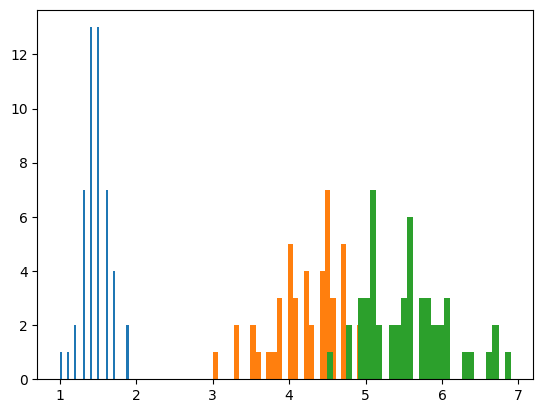

time: 503 ms (started: 2024-06-28 07:21:00 +00:00)


In [114]:
plt.hist(df_setosa['Petal Length'], bins=30)
plt.hist(df_versicolor['Petal Length'], bins=30)
plt.hist(df_virginica['Petal Length'], bins=30)

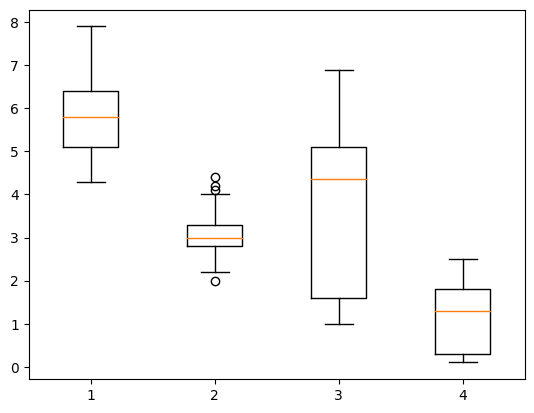

time: 325 ms (started: 2024-06-28 07:21:01 +00:00)


In [115]:
plt.boxplot(df[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']])
plt.show()

### 결측치

In [116]:
df.isna().sum(axis=0)

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64

time: 8.73 ms (started: 2024-06-28 07:21:01 +00:00)


### 중복치

In [117]:
df.duplicated().sum()

1

time: 7.6 ms (started: 2024-06-28 07:21:01 +00:00)


## 학습용, 테스트 데이터 분리

In [118]:
df = df.sample(frac = 1)
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
138,6.0,3.0,4.8,1.8,virginica
87,6.3,2.3,4.4,1.3,versicolor
19,5.1,3.8,1.5,0.3,setosa
72,6.3,2.5,4.9,1.5,versicolor
77,6.7,3.0,5.0,1.7,versicolor


time: 27.9 ms (started: 2024-06-28 07:21:01 +00:00)


In [119]:
idx_train = int(len(df) * 0.8)

time: 532 µs (started: 2024-06-28 07:21:01 +00:00)


In [120]:
train = df.iloc[:idx_train]
test = df.iloc[idx_train:]

train.shape, test.shape

((120, 5), (30, 5))

time: 3.7 ms (started: 2024-06-28 07:21:01 +00:00)


### X, y 변수 분리

In [121]:
X_train = train.drop('Species', axis = 1)
y_train = train['Species']

time: 1.24 ms (started: 2024-06-28 07:21:01 +00:00)


In [122]:
y_train.value_counts()

Species
versicolor    44
virginica     40
setosa        36
Name: count, dtype: int64

time: 4.47 ms (started: 2024-06-28 07:21:01 +00:00)


## 스케일링

In [123]:
u = X_train.mean()
std = X_train.std()
u, std

(Sepal Length    5.930000
 Sepal Width     3.045833
 Petal Length    3.897500
 Petal Width     1.253333
 dtype: float64,
 Sepal Length    0.851356
 Sepal Width     0.404366
 Petal Length    1.759653
 Petal Width     0.754475
 dtype: float64)

time: 11.8 ms (started: 2024-06-28 07:21:01 +00:00)


In [124]:
X_train_s = (X_train - u) / std
X_train_s.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
138,0.082222,-0.113346,0.512885,0.724566
87,0.434601,-1.844451,0.285568,0.061853
19,-0.974916,1.865059,-1.362484,-1.263572
72,0.434601,-1.349850,0.569714,0.326938
77,0.904440,-0.113346,0.626544,0.592023


time: 15.7 ms (started: 2024-06-28 07:21:01 +00:00)


In [125]:
ss_dic = {'mean':u, 'std':std}
ss_dic

{'mean': Sepal Length    5.930000
 Sepal Width     3.045833
 Petal Length    3.897500
 Petal Width     1.253333
 dtype: float64,
 'std': Sepal Length    0.851356
 Sepal Width     0.404366
 Petal Length    1.759653
 Petal Width     0.754475
 dtype: float64}

time: 5.66 ms (started: 2024-06-28 07:21:01 +00:00)


## 인코딩

In [126]:
label_dict = {'setosa':0, 'versicolor':1, 'virginica':2}

time: 624 µs (started: 2024-06-28 07:21:01 +00:00)


In [127]:
y_train

138     virginica
87     versicolor
19         setosa
72     versicolor
77     versicolor
          ...    
25         setosa
127     virginica
51     versicolor
56     versicolor
102     virginica
Name: Species, Length: 120, dtype: object

time: 7.07 ms (started: 2024-06-28 07:21:01 +00:00)


In [128]:
y_train_e = y_train.map(label_dict)
y_train_e

138    2
87     1
19     0
72     1
77     1
      ..
25     0
127    2
51     1
56     1
102    2
Name: Species, Length: 120, dtype: int64

time: 8.13 ms (started: 2024-06-28 07:21:01 +00:00)


In [129]:
X_train_s = X_train_s.to_numpy()
y_train_e = y_train_e.to_numpy()

time: 690 µs (started: 2024-06-28 07:21:01 +00:00)


In [130]:
print(X_train_s.shape, y_train_e.shape)
print(type(X_train_s), type(y_train_e))

(120, 4) (120,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 2.68 ms (started: 2024-06-28 07:21:01 +00:00)


## 모델 학습

In [131]:
from keras.utils import to_categorical
y_train_o = to_categorical(y_train_e)
y_train_o

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1

time: 21.1 ms (started: 2024-06-28 07:21:02 +00:00)


In [132]:
print(X_train_s.shape, y_train_o.shape)
print(type(X_train_s), type(y_train_o))

(120, 4) (120, 3)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 2.76 ms (started: 2024-06-28 07:21:02 +00:00)


In [133]:
X_train_s.shape

(120, 4)

time: 4.66 ms (started: 2024-06-28 07:21:02 +00:00)


In [134]:
from keras import layers

model = keras.Sequential([
    layers.Dense(units=16, activation='relu', input_shape=(4,)),
    layers.Dense(units=8, activation='relu'),
    layers.Dense(units=3, activation='softmax')
])

time: 69.4 ms (started: 2024-06-28 07:21:02 +00:00)


In [135]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                80        
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 3)                 27        
                                                                 
Total params: 243 (972.00 Byte)
Trainable params: 243 (972.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 33.5 ms (started: 2024-06-28 07:21:02 +00:00)


In [136]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

time: 33.5 ms (started: 2024-06-28 07:21:02 +00:00)


In [137]:
EPOCHS = 100
BATCH_SIZE = 32

history = model.fit(X_train_s, y_train_o, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 2s 167ms/step - loss: 1.2036 - accuracy: 0.3229 - val_loss: 1.1339 - val_accuracy: 0.2917
Epoch 2/100
3/3 [==============================] - 0s 33ms/step - loss: 1.1642 - accuracy: 0.3542 - val_loss: 1.0917 - val_accuracy: 0.2917
Epoch 3/100
3/3 [==============================] - 0s 69ms/step - loss: 1.1294 - accuracy: 0.3750 - val_loss: 1.0528 - val_accuracy: 0.3750
Epoch 4/100
3/3 [==============================] - 0s 60ms/step - loss: 1.0970 - accuracy: 0.4375 - val_loss: 1.0167 - val_accuracy: 0.4167
Epoch 5/100
3/3 [==============================] - 0s 58ms/step - loss: 1.0663 - accuracy: 0.4688 - val_loss: 0.9820 - val_accuracy: 0.3750
Epoch 6/100
3/3 [==============================] - 0s 52ms/step - loss: 1.0382 - accuracy: 0.5208 - val_loss: 0.9494 - val_accuracy: 0.4167
Epoch 7/100
3/3 [==============================] - 0s 31ms/step - loss: 1.0104 - accuracy: 0.5938 - val_loss: 0.9195 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

In [138]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

time: 6.31 ms (started: 2024-06-28 07:21:24 +00:00)


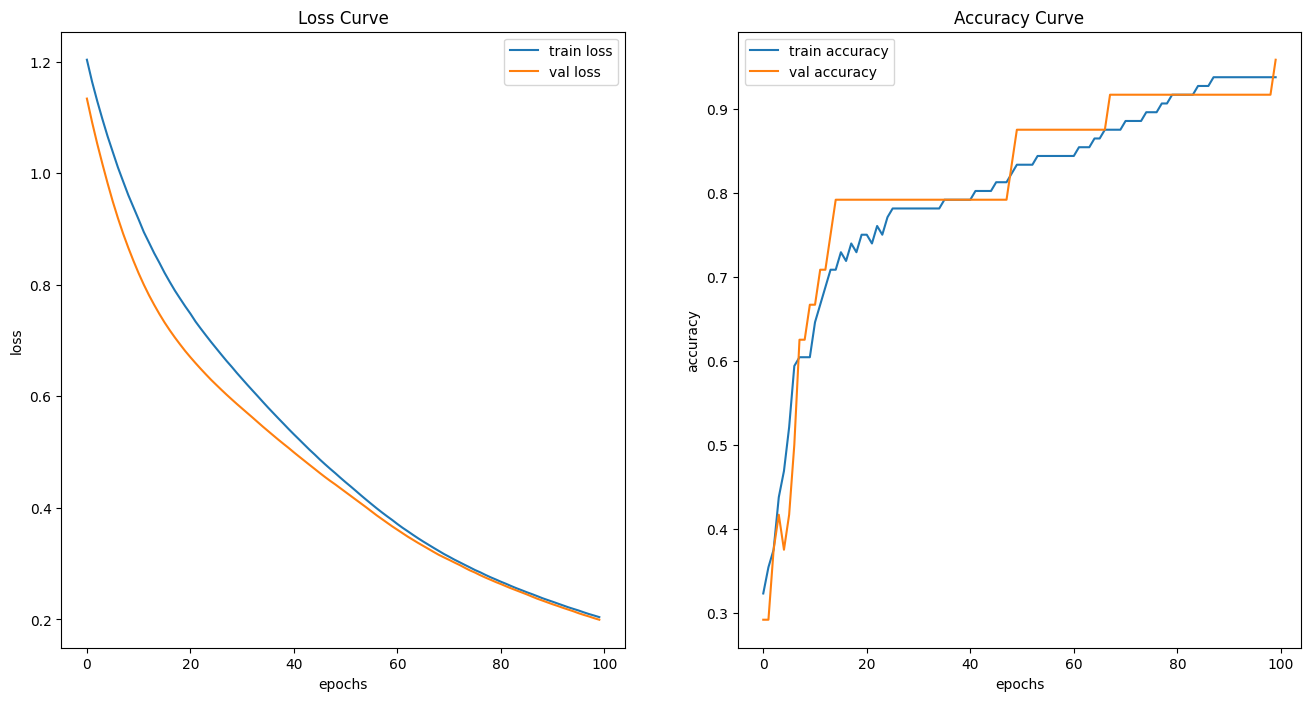

time: 1.04 s (started: 2024-06-28 07:21:24 +00:00)


In [139]:
plot_history(history)

## 테스트

In [140]:
test.shape

(30, 5)

time: 3.31 ms (started: 2024-06-28 07:21:25 +00:00)


In [141]:
test.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
79,5.7,2.6,3.5,1.0,versicolor
44,5.1,3.8,1.9,0.4,setosa
133,6.3,2.8,5.1,1.5,virginica
24,4.8,3.4,1.9,0.2,setosa
142,5.8,2.7,5.1,1.9,virginica


time: 25.5 ms (started: 2024-06-28 07:21:25 +00:00)


In [142]:
X_test = test.drop('Species', axis = 1)
y_test = test['Species']

time: 4.22 ms (started: 2024-06-28 07:21:25 +00:00)


In [143]:
X_test_s = (X_test - ss_dic['mean']) / ss_dic['std']
y_test_e = y_test.map(label_dict)

time: 5.83 ms (started: 2024-06-28 07:21:25 +00:00)


In [144]:
X_test_s = X_test_s.to_numpy()
y_test_e = y_test_e.to_numpy()

time: 1.19 ms (started: 2024-06-28 07:21:25 +00:00)


In [145]:
X_test_s.shape, y_test_e.shape

((30, 4), (30,))

time: 3.2 ms (started: 2024-06-28 07:21:25 +00:00)


In [146]:
y_pred = model.predict(X_test_s)
y_pred

1/1 [==============================] - 0s 253ms/step


array([[4.0157095e-02, 9.2518896e-01, 3.4653910e-02],
       [9.8596889e-01, 1.2542744e-02, 1.4883277e-03],
       [5.6657366e-02, 4.7146440e-01, 4.7187814e-01],
       [9.9264222e-01, 6.3978168e-03, 9.5996127e-04],
       [4.3316197e-02, 2.8526461e-01, 6.7141920e-01],
       [9.7703594e-01, 2.0773346e-02, 2.1907107e-03],
       [9.9713230e-01, 2.4116705e-03, 4.5601805e-04],
       [2.9599676e-02, 9.2630702e-01, 4.4093199e-02],
       [1.3548241e-02, 7.2740361e-02, 9.1371131e-01],
       [6.8139106e-02, 7.2760212e-01, 2.0425870e-01],
       [1.1228172e-02, 6.0661297e-02, 9.2811048e-01],
       [9.9139512e-01, 7.7451081e-03, 8.5969520e-04],
       [2.1176687e-02, 9.5597613e-01, 2.2847032e-02],
       [9.9250591e-01, 6.8085892e-03, 6.8545202e-04],
       [9.9278438e-01, 6.2608691e-03, 9.5468626e-04],
       [2.4972346e-02, 9.4065356e-01, 3.4374140e-02],
       [9.9864918e-01, 1.1682614e-03, 1.8259161e-04],
       [1.8512663e-02, 9.2038465e-01, 6.1102711e-02],
       [9.9123466e-01, 7.006

time: 354 ms (started: 2024-06-28 07:21:25 +00:00)


In [147]:
y_pred = np.argmax(y_pred, axis = 1)
y_pred

array([1, 0, 2, 0, 2, 0, 0, 1, 2, 1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2,
       2, 1, 2, 0, 0, 0, 2, 0])

time: 4.98 ms (started: 2024-06-28 07:21:25 +00:00)


In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
def print_metrics(y_true, y_pred, aver='macro'):
    print("accuracy:", accuracy_score(y_true, y_pred))
    print("recall_score:", recall_score(y_true, y_pred, average = aver))
    print("precision_score:", precision_score(y_true, y_pred, average = aver))
    print("f1_score:", f1_score(y_true, y_pred, average = aver))
    cfm = confusion_matrix(y_true, y_pred)
    s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt = 'd', cbar=False)
    s.set(xlabel='Prediction', ylabel='Actual')
    plt.show()

time: 1.25 ms (started: 2024-06-28 07:21:25 +00:00)


accuracy: 0.9333333333333333
recall_score: 0.9333333333333332
precision_score: 0.9166666666666666
f1_score: 0.9153439153439153


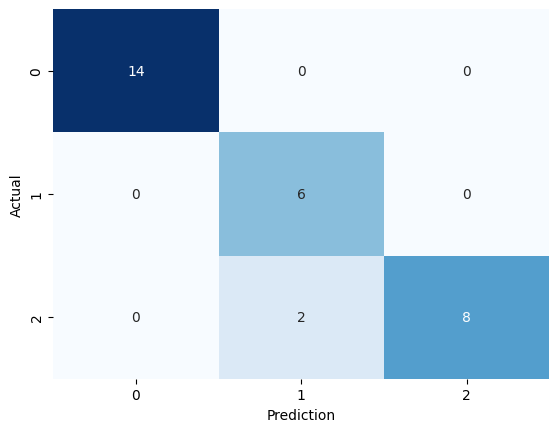

time: 286 ms (started: 2024-06-28 07:21:25 +00:00)


In [149]:
print_metrics(y_test_e, y_pred)